## Part II – Using the perceptron:

In [2]:
# load packages

using Flux, Images, MLDatasets, Plots

using Flux: crossentropy, onecold, onehotbatch, params, train!

using Random, Statistics


In [3]:
# set random seed

Random.seed!(1)


TaskLocalRNG()

In [34]:
# load data

# X contains the images and y contains the labels

X_train_full, y_train_full = MLDatasets.MNIST(:train)[:]; @show typeof(X_train_full), size(X_train_full)

X_test_full, y_test_full = MLDatasets.MNIST(:test)[:]; @show typeof(X_test_full), size(X_test_full);


(typeof(X_train_full), size(X_train_full)) = (Array{Float32, 3}, (28, 28, 60000))
(typeof(X_test_full), size(X_test_full)) = (Array{Float32, 3}, (28, 28, 10000))


In [45]:
# Filter the dataset to keep only 0s and 1s
filter_indices_train = findall(x -> x in [0, 1], y_train_full);
filter_indices_test = findall(x -> x in [0, 1], y_test_full);

In [46]:
# Keep only 0s and 1s in the training data and labels

# Latex: let's use \_rho for Raw Data i.e X_trainᵨ

X_trainᵨ = X_train_full[:, :, filter_indices_train]
y_trainᵨ = y_train_full[filter_indices_train]; @show typeof(X_trainᵨ), size(X_trainᵨ);

# Keep only 0s and 1s in the test data and labels
X_testᵨ = X_test_full[:, :, filter_indices_test];
y_testᵨ = y_test_full[filter_indices_test]; @show typeof(X_testᵨ), size(X_testᵨ);

(typeof(X_trainᵨ), size(X_trainᵨ)) = (Array{Float32, 3}, (28, 28, 12665))
(typeof(X_testᵨ), size(X_testᵨ)) = (Array{Float32, 3}, (28, 28, 2115))


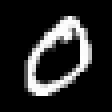

In [47]:
# view training input

index = 1; img = X_trainᵨ[:, :, index]

# use the ' transpose sign to invert the image

colorview(Gray, img')


In [48]:
# view training label

y_trainᵨ[index]


0

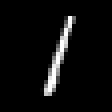

In [49]:
# view testing input

colorview(Gray, X_testᵨ[:, :, index]')


In [50]:
# view testing label

y_testᵨ[index]


1

In [51]:
# flatten input data

X_train = Flux.flatten(X_trainᵨ); @show typeof(X_train), size(X_train)

X_test = Flux.flatten(X_testᵨ); @show typeof(X_test), size(X_test);


(typeof(X_train), size(X_train)) = (Matrix{Float32}, (784, 12665))
(typeof(X_test), size(X_test)) = (Matrix{Float32}, (784, 2115))


&#x1F4CD; Note: Dimensions

> Hint: The digits dataset is a dataset of images. You need to convert them from a 2D array to a 1D one.

Flattening allow the data to strip down from an array of three dimensions `Array{Float32, 3}, (28, 28, 12665)` to a Matrix  `Matrix{Float32}, (784, 12665)` for the filtered X_train data.
The 28x28 tensor array has been replaced to a 784 column vector where each column contains the floating point numbers associated with each image.


In [52]:
# one-hot encode labels

y_train = onehotbatch(y_trainᵨ, 0:1)

y_test = onehotbatch(y_testᵨ, 0:1)


2×2115 OneHotMatrix(::Vector{UInt32}) with eltype Bool:
 ⋅  1  ⋅  1  1  ⋅  1  1  ⋅  ⋅  ⋅  ⋅  ⋅  …  1  1  ⋅  ⋅  1  1  ⋅  ⋅  1  ⋅  1  ⋅
 1  ⋅  1  ⋅  ⋅  1  ⋅  ⋅  1  1  1  1  1     ⋅  ⋅  1  1  ⋅  ⋅  1  1  ⋅  1  ⋅  1

&#x1F4CD; Note: one-hot encoding

As you can see with the above result,  the 1st label appearing in `y_testᵨ` previously viewed is a `one` label. In the column vector, it appears at the 2nd row; (marked by  a ${\color{Green}1}$) because, the column vector starts from 0 and ends at 1 (labels). The dots represent  zeroes ${\color{Salmon}0}$.


As a side note, Julia's `Array,Matrix` indexing is 1-based, like Matlab. Python indexing is 0-based.

<img src=images/one-hot-label-filtered.png width='' height='' > </img>

In [53]:
# define model architecture

model = Chain(
    Dense(28 * 28, 32, relu),
    Dense(32, 2), # only 0 to 1
    softmax
)

Chain(
  Dense(784 => 32, relu),               # 25_120 parameters
  Dense(32 => 2),                       # 66 parameters
  NNlib.softmax,
)                   # Total: 4 arrays, 25_186 parameters, 98.633 KiB.

In [54]:
# define loss function 𝐿

𝐿(x, y) = crossentropy(model(x), y)


𝐿 (generic function with 1 method)

In [55]:
# track parameters called θ

θ = params(model);

In [56]:
# select optimizer

# Let's define the learning rate η \eta
η = Float32(0.01)

opt = ADAM(η)

Adam(0.009999999776482582, (0.9, 0.999), 1.0e-8, IdDict{Any, Any}())

In [66]:
# train model

# Let's keep track of the loss history
loss_history = []

# The sample set being small, let's use 130 epochs
epochs = 130

for epoch in 1:epochs
    # train model
    train!(𝐿, θ, [(X_train, y_train)], opt)
    # print report
    train_loss = 𝐿(X_train, y_train)
    push!(loss_history, train_loss)
    println("Epoch = $epoch : Training Loss = $train_loss")
end

Epoch = 1 : Training Loss = 1.4247454e-5
Epoch = 2 : Training Loss = 1.4169603e-5
Epoch = 3 : Training Loss = 1.4092728e-5
Epoch = 4 : Training Loss = 1.403539e-5
Epoch = 5 : Training Loss = 1.3962392e-5
Epoch = 6 : Training Loss = 1.3882729e-5
Epoch = 7 : Training Loss = 1.3817105e-5
Epoch = 8 : Training Loss = 1.3750902e-5
Epoch = 9 : Training Loss = 1.368175e-5
Epoch = 10 : Training Loss = 1.3609256e-5
Epoch = 11 : Training Loss = 1.353994e-5
Epoch = 12 : Training Loss = 1.3475681e-5
Epoch = 13 : Training Loss = 1.3405649e-5
Epoch = 14 : Training Loss = 1.3336776e-5
Epoch = 15 : Training Loss = 1.3274437e-5
Epoch = 16 : Training Loss = 1.3217992e-5
Epoch = 17 : Training Loss = 1.3149212e-5
Epoch = 18 : Training Loss = 1.3088001e-5
Epoch = 19 : Training Loss = 1.3033717e-5
Epoch = 20 : Training Loss = 1.2964408e-5
Epoch = 21 : Training Loss = 1.2899249e-5
Epoch = 22 : Training Loss = 1.28441325e-5
Epoch = 23 : Training Loss = 1.2781545e-5
Epoch = 24 : Training Loss = 1.2718513e-5
Epo

In [67]:
# make predictions

# Let's call the predicted variable ŷ (Latex: \hat{y} or y\hat)

ŷᵨ = model(X_test)

ŷ = onecold(ŷᵨ) .- 1

y = y_testᵨ

mean(ŷ .== y)

0.9995271867612293

In [74]:
# display results

check = [ŷ[i] == y[i] for i in 1:length(y)]

index = collect(1:length(y))

check_display = [index ŷ y check]; @show typeof(check_display)

typeof(check_display) = Matrix{Int64}


Matrix{Int64} (alias for Array{Int64, 2})

In [76]:
findall(x -> x == false, check_display)

1960-element Vector{CartesianIndex{2}}:
 CartesianIndex(2, 2)
 CartesianIndex(4, 2)
 CartesianIndex(5, 2)
 CartesianIndex(7, 2)
 CartesianIndex(8, 2)
 CartesianIndex(15, 2)
 CartesianIndex(17, 2)
 CartesianIndex(18, 2)
 CartesianIndex(23, 2)
 CartesianIndex(25, 2)
 CartesianIndex(27, 2)
 CartesianIndex(31, 2)
 CartesianIndex(33, 2)
 ⋮
 CartesianIndex(2093, 3)
 CartesianIndex(2095, 3)
 CartesianIndex(2098, 3)
 CartesianIndex(2100, 3)
 CartesianIndex(2102, 3)
 CartesianIndex(2104, 3)
 CartesianIndex(2105, 3)
 CartesianIndex(2108, 3)
 CartesianIndex(2109, 3)
 CartesianIndex(2112, 3)
 CartesianIndex(2114, 3)
 CartesianIndex(2032, 4)

(y[misclass_index], ŷ[misclass_index]) = (0, 0)


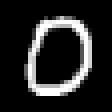

In [78]:
# view misclassifications

misclass_index = 4
img = X_testᵨ[:, :, misclass_index]

@show y[misclass_index], ŷ[misclass_index];

colorview(Gray, img')

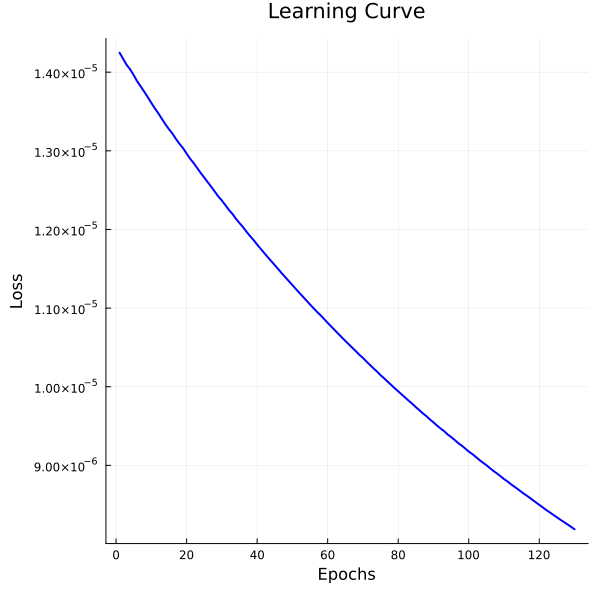

In [71]:
# initialize plot

gr(size = (600, 600))

# plot learning curve

# p_l_curve = 
plot(1:epochs, loss_history,
    xlabel = "Epochs",
    ylabel = "Loss",
    title = "Learning Curve",
    legend = false,
    color = :blue,
    linewidth = 2
)
# save plot
# savefig(p_l_curve, "images/ann_learning_curve.svg");

# References

- [ ] [Is there a way to print loss from Flux.train?](https://stackoverflow.com/questions/73737260/is-there-a-way-to-print-loss-from-flux-train)
- [ ] [The Future of Machine Learning and why it looks a lot like Julia 🤖](https://towardsdatascience.com/the-future-of-machine-learning-and-why-it-looks-a-lot-like-julia-a0e26b51f6a6)